# Import the training data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_columns', 100)

DB_status = pd.read_excel("MG ML [Predict_status]/MG ML derivation dataset.xlsx").drop(['Only_ID', 'Stage', 'Duration' ,'Predict_QMG_change', 'VC', 'Visting_date'], axis=1)

DB_status['Predict_status'].value_counts()


Stable      841
Improved    629
Worse       216
Name: Predict_status, dtype: int64

In [2]:
DB_status.columns

Index(['Predict_status', 'Gender', 'MGFA_type', 'Clinical_type', 'Thymoma',
       'Other autoimmune diseases', 'Comorbidity', 'Weight', 'Height', 'SBP',
       'DBP', 'Heart rate', 'Waistline', 'Hipline',
       'QMG: Double vision on lateral gaze', 'QMG: Ptosis (upward gaze)',
       'QMG: Facial muscles', 'QMG: Swallowing 4 oz. water',
       'QMG: Speech following counting', 'QMG: Right arm outstretched',
       'QMG: Left arm outstretched', 'QMG: Vital capacity',
       'QMG: Right hand grip', 'QMG: Left hand grip',
       'QMG: Head lifted (45° supine)', 'QMG: Right leg outstretched',
       'QMG: Left leg outstretched', 'ADL: Talking', 'ADL: Chewing',
       'ADL: Swallowing', 'ADL: Breathing',
       'ADL: Impairment of ability to brush teeth',
       'ADL: Impairment of ability to arise', 'ADL: Double vision',
       'ADL: Eyelid droop', 'QOL: Be frustrated by MG',
       'QOL: Having trouble using eyes', 'QOL: Having trouble eating',
       'QOL: Limited social activity', 'QO

# Preliminary feature selection

<Figure size 6000x6000 with 0 Axes>

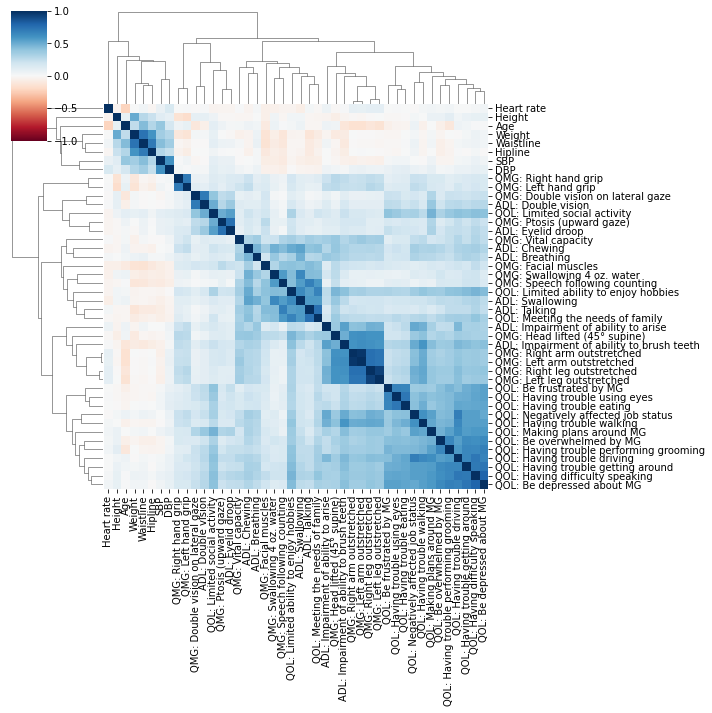

In [3]:
plt.figure(figsize=(20, 20), dpi=300)
sns.clustermap(DB_status.corr(), cmap="RdBu", vmin=-1, yticklabels=True,  xticklabels=True)
plt.savefig('Before_selection.svg', dpi=300, transparent=False)

In [4]:
DB_status = DB_status.drop(['QOL: Be frustrated by MG','QOL: Having trouble using eyes','QOL: Having trouble eating','QOL: Limited social activity','QOL: Limited ability to enjoy hobbies','QOL: Meeting the needs of family','QOL: Making plans around MG','QOL: Negatively affected job status','QOL: Having difficulty speaking','QOL: Having trouble driving','QOL: Be depressed about MG','QOL: Having trouble walking','QOL: Having trouble getting around','QOL: Be overwhelmed by MG','QOL: Having trouble performing grooming'], axis=1)

DB_status['Predict_status'].value_counts()

Stable      841
Improved    629
Worse       216
Name: Predict_status, dtype: int64

<Figure size 6000x6000 with 0 Axes>

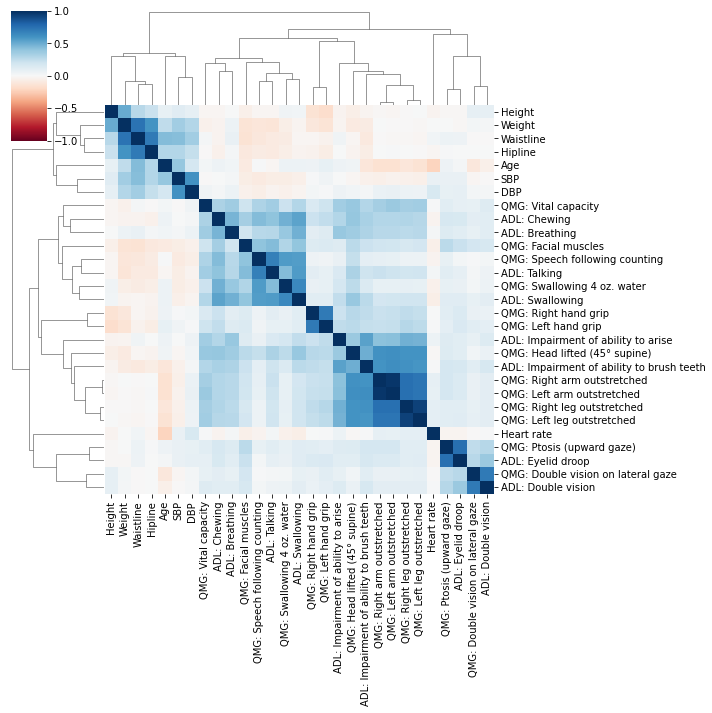

In [5]:
plt.figure(figsize=(20, 20), dpi=300)
sns.clustermap(DB_status.corr(), cmap="RdBu", vmin=-1, yticklabels=True,  xticklabels=True)
plt.savefig('1st_selection.svg', dpi=300, transparent=False)

# Import external dataset

In [6]:
DB_external = pd.read_excel("MG ML [Predict_status]/MG ML validation dataset.xlsx").drop(['MG_Center', 'Patient_ID'], axis=1) #
DB_external['Predict_status'].value_counts()

Improved    127
Stable       76
Worse        46
Name: Predict_status, dtype: int64

In [7]:
DB_external.columns

Index(['Predict_status', 'Gender', 'Weight', 'Height', 'SBP', 'DBP',
       'Heart rate', 'Waistline', 'Hipline', 'MGFA_type', 'Clinical_type',
       'Thymoma', 'Other autoimmune diseases', 'Comorbidity',
       'QMG: Double vision on lateral gaze', 'QMG: Ptosis (upward gaze)',
       'QMG: Facial muscles', 'QMG: Swallowing 4 oz. water',
       'QMG: Speech following counting', 'QMG: Right arm outstretched',
       'QMG: Left arm outstretched', 'QMG: Vital capacity',
       'QMG: Right hand grip', 'QMG: Left hand grip',
       'QMG: Head lifted (45° supine)', 'QMG: Right leg outstretched',
       'QMG: Left leg outstretched', 'ADL: Talking', 'ADL: Chewing',
       'ADL: Swallowing', 'ADL: Breathing',
       'ADL: Impairment of ability to brush teeth',
       'ADL: Impairment of ability to arise', 'ADL: Double vision',
       'ADL: Eyelid droop', 'QOL: Be frustrated by MG',
       'QOL: Having trouble using eyes', 'QOL: Having trouble eating',
       'QOL: Limited social activity', 'QO

In [8]:
MG_score_names = DB_status.columns.values.tolist()[7:36] #
MG_score_names

['Weight',
 'Height',
 'SBP',
 'DBP',
 'Heart rate',
 'Waistline',
 'Hipline',
 'QMG: Double vision on lateral gaze',
 'QMG: Ptosis (upward gaze)',
 'QMG: Facial muscles',
 'QMG: Swallowing 4 oz. water',
 'QMG: Speech following counting',
 'QMG: Right arm outstretched',
 'QMG: Left arm outstretched',
 'QMG: Vital capacity',
 'QMG: Right hand grip',
 'QMG: Left hand grip',
 'QMG: Head lifted (45° supine)',
 'QMG: Right leg outstretched',
 'QMG: Left leg outstretched',
 'ADL: Talking',
 'ADL: Chewing',
 'ADL: Swallowing',
 'ADL: Breathing',
 'ADL: Impairment of ability to brush teeth',
 'ADL: Impairment of ability to arise',
 'ADL: Double vision',
 'ADL: Eyelid droop',
 'Age']

# Initiate a pycaret training pipline 

In [9]:
from pycaret.classification import *
exp_clf102 = setup(data = DB_status, target = 'Predict_status', session_id=223,  test_data=DB_external, imputation_type='iterative',  iterative_imputation_iters = 5, 
                  normalize = True, 
                  transformation = True,
                  fix_imbalance = True, 
                  feature_selection = True, feature_selection_threshold = 0.6, feature_selection_method = "classic", 
                  numeric_features = MG_score_names, 
                  ignore_features = ['Clinical_type', 'MGFA_type','ADL: Eyelid droop', 'ADL: Double vision', 'QMG: Vital capacity', 'ADL: Talking', 'ADL: Swallowing', 'QMG: Right arm outstretched', 'QMG: Right leg outstretched', 'QMG: Right hand grip','Hipline', 'Waistline'],
                  use_gpu=True, silent = True)

,Description,Value
0,session_id,223
1,Target,Predict_status
2,Target Type,Multiclass
3,Label Encoded,"Improved: 0, Stable: 1, Worse: 2"
4,Original Data,"(1686, 42)"
5,Missing Values,True
6,Numeric Features,19
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


# After secondary feature selection

<Figure size 6000x6000 with 0 Axes>

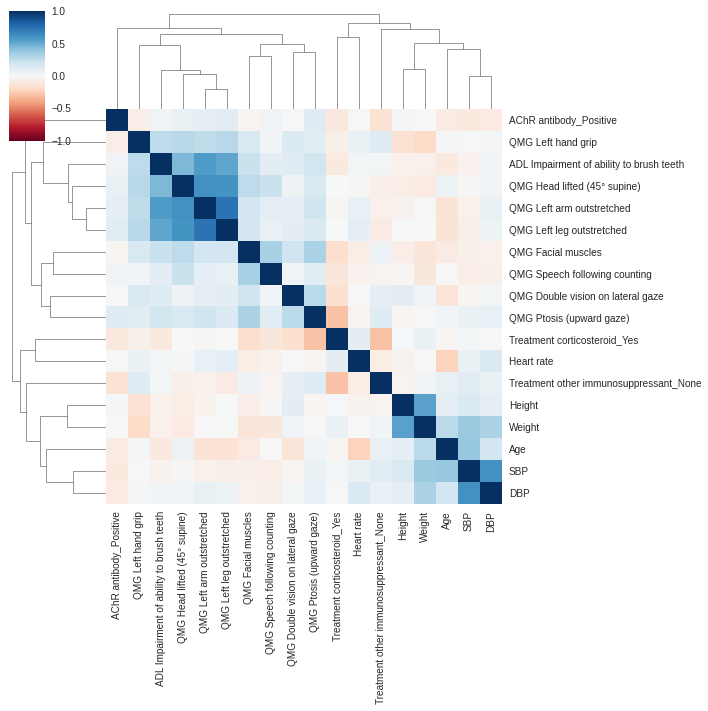

In [10]:
After_selection = get_config('X_train')

plt.figure(figsize=(20, 20), dpi=300)
sns.clustermap(After_selection.corr(), cmap="RdBu", vmin=-1,  yticklabels=True,  xticklabels=True) 
plt.savefig('2nd_selection.png', dpi=300, transparent=True)

In [11]:
from sklearn.metrics import roc_auc_score
add_metric('auc2', 'AUC_ovr', roc_auc_score, target='pred_proba', multi_class= 'ovr', average='weighted')
add_metric('auc3', 'AUC_ovo', roc_auc_score, target='pred_proba', multi_class= 'ovo', average='weighted')

Name                                                           AUC_ovo
Display Name                                                   AUC_ovo
Score Function              <function roc_auc_score at 0x7fb6743aa5f0>
Scorer               make_scorer(roc_auc_score, needs_proba=True, e...
Target                                                      pred_proba
Args                     {'multi_class': 'ovo', 'average': 'weighted'}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: auc3, dtype: object

In [12]:
best_model = compare_models(sort='F1', fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,AUC_ovr,AUC_ovo,TT (Sec)
rf,Random Forest Classifier,0.6038,0.7207,0.5002,0.5924,0.5853,0.3156,0.3221,0.7207,0.6948,1.1050
ada,Ada Boost Classifier,0.5872,0.7085,0.5081,0.5885,0.5849,0.3089,0.3109,0.7085,0.6850,0.2370
et,Extra Trees Classifier,0.5943,0.7169,0.4855,0.5794,0.5756,0.2941,0.2987,0.7169,0.6942,1.1280
gbc,Gradient Boosting Classifier,0.5860,0.7130,0.4845,0.5738,0.5742,0.2942,0.2973,0.7130,0.6868,1.6290
lightgbm,Light Gradient Boosting Machine,0.5795,0.6999,0.4691,0.5588,0.5635,0.2767,0.2805,0.6999,0.6744,1.1830
lr,Logistic Regression,0.5012,0.7206,0.5086,0.5813,0.5149,0.2501,0.2659,0.7206,0.7033,0.0760
lda,Linear Discriminant Analysis,0.5018,0.7236,0.5093,0.5793,0.5139,0.2502,0.2659,0.7236,0.7052,0.0530
qda,Quadratic Discriminant Analysis,0.5030,0.6697,0.4735,0.5478,0.5134,0.2221,0.2292,0.6697,0.6493,0.0460
dt,Decision Tree Classifier,0.4989,0.5875,0.4345,0.5148,0.5032,0.1712,0.1728,0.5875,0.5781,0.0580
ridge,Ridge Classifier,0.4953,0.0000,0.5077,0.5840,0.5001,0.2478,0.2686,0.0000,0.0000,0.0700


In [13]:
et = create_model('rf')
tuned_model = tune_model(et, optimize = 'F1', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,AUC_ovr,AUC_ovo
0,0.5858,0.7192,0.4986,0.5885,0.5857,0.3135,0.3145,0.7192,0.6950
1,0.5917,0.7285,0.5293,0.5939,0.5863,0.3002,0.3023,0.7285,0.7172
2,0.6095,0.7459,0.5037,0.6008,0.6018,0.3270,0.3298,0.7459,0.7181
3,0.5621,0.6887,0.4977,0.5842,0.5545,0.2843,0.2974,0.6887,0.6705
4,0.5562,0.6605,0.4845,0.5614,0.5575,0.2674,0.2682,0.6605,0.6526
5,0.6095,0.7255,0.5044,0.5910,0.5958,0.3356,0.3387,0.7255,0.6849
6,0.6310,0.7444,0.5265,0.6151,0.6187,0.3608,0.3629,0.7444,0.7287
7,0.6250,0.7341,0.4987,0.5992,0.6022,0.3394,0.3438,0.7341,0.6935
8,0.6250,0.7267,0.5503,0.6304,0.6188,0.3455,0.3477,0.7267,0.7109
9,0.6071,0.7612,0.5013,0.5865,0.5926,0.3222,0.3246,0.7612,0.7532


# Model performance evaluation

In [14]:
Evaluation1 = predict_model(tuned_model, DB_status, raw_score=True, encoded_labels=True) 
Evaluation2 = predict_model(tuned_model, DB_external, raw_score=True, encoded_labels=True) 

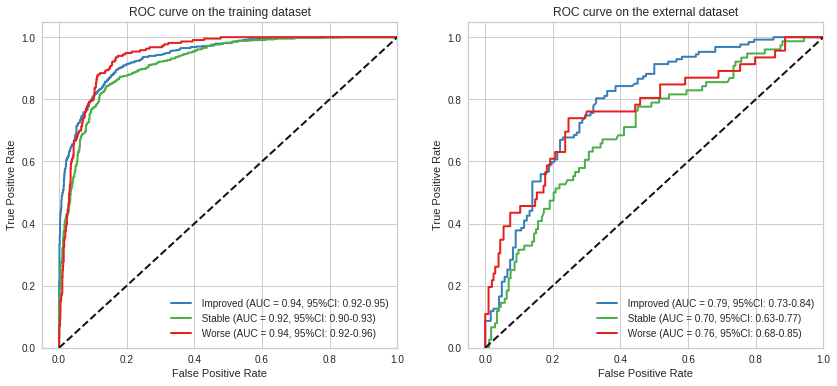

In [15]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from math import sqrt

# AUC curve
def roc_auc_ci(y_true, y_score, positive=1):
    AUC = roc_auc_score(y_true, y_score)
    N1 = sum(y_true == positive)
    N2 = sum(y_true != positive)
    Q1 = AUC / (2 - AUC)
    Q2 = 2*AUC**2 / (1 + AUC)
    SE_AUC = sqrt((AUC*(1 - AUC) + (N1 - 1)*(Q1 - AUC**2) + (N2 - 1)*(Q2 - AUC**2)) / (N1*N2))
    lower = AUC - 1.96*SE_AUC
    upper = AUC + 1.96*SE_AUC
    if lower < 0:
        lower = 0
    if upper > 1:
        upper = 1
    return (lower, upper)

n_classes = 3
classes = ['Improved', 'Stable', 'Worse']

y_test1 = label_binarize(Evaluation1['Predict_status'], classes=['Improved', 'Stable', 'Worse']) #
y_score1 = Evaluation1[['Score_0', 'Score_1', 'Score_2']].to_numpy()


fpr1 = dict()
tpr1 = dict()
roc_auc1 = dict()
auc_CI1= dict()
lw=2

for i in range(n_classes):
    fpr1[i], tpr1[i], _ = roc_curve(y_test1[:, i], y_score1[:, i])
    roc_auc1[i] = auc(fpr1[i], tpr1[i])
    auc_CI1[i] = roc_auc_ci(y_test1[:, i], y_score1[:, i])


y_test2 = label_binarize(Evaluation2['Predict_status'], classes=['Improved', 'Stable', 'Worse']) #
y_score2 = Evaluation2[['Score_0', 'Score_1', 'Score_2']].to_numpy()


fpr2 = dict()
tpr2 = dict()
auc_CI2 = dict()
roc_auc2 = dict()
lw=2

for i in range(n_classes):
    fpr2[i], tpr2[i], _ = roc_curve(y_test2[:, i], y_score2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])
    auc_CI2[i] = roc_auc_ci(y_test2[:, i], y_score2[:, i])

colors = cycle(['#377eb8', '#4daf4a', '#e4211c'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

for i, color in zip(range(n_classes), colors):
    ax1.plot(fpr1[i], tpr1[i], color=color, lw=2,
             label= f' {classes[i]} (AUC = {roc_auc1[i]:0.2f}, 95%CI: {auc_CI1[i][0]:0.2f}-{auc_CI1[i][1]:0.2f})')
ax1.plot([0, 1], [0, 1], 'k--', lw=lw)
ax1.set(title='ROC curve on the training dataset', xlabel='False Positive Rate', ylabel='True Positive Rate', xlim=[-0.05, 1.0], ylim=[0.0, 1.05])
ax1.legend(loc="lower right")

for i, color in zip(range(n_classes), colors):
    ax2.plot(fpr2[i], tpr2[i], color=color, lw=2,
             label= f' {classes[i]} (AUC = {roc_auc2[i]:0.2f}, 95%CI: {auc_CI2[i][0]:0.2f}-{auc_CI2[i][1]:0.2f})')
ax2.plot([0, 1], [0, 1], 'k--', lw=lw)
ax2.set(title='ROC curve on the external dataset', xlabel='False Positive Rate', ylabel='True Positive Rate', xlim=[-0.05, 1.0], ylim=[0.0, 1.05])
ax2.legend(loc="lower right")

plt.savefig('AUC.svg', dpi=300, transparent=True)


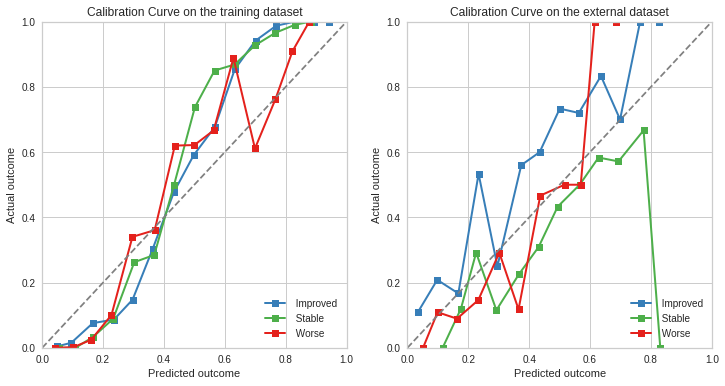

In [16]:
# Calibration_curve
from sklearn.calibration import calibration_curve

fraction_of_positives1 = dict()
mean_predicted_value1 = dict()
fraction_of_positives2 = dict()
mean_predicted_value2 = dict()

for i in range(3):
    fraction_of_positives1[i], mean_predicted_value1[i] = calibration_curve(y_test1[:, i],  y_score1[:, i], n_bins=15)
    fraction_of_positives2[i], mean_predicted_value2[i] = calibration_curve(y_test2[:, i],  y_score2[:, i], n_bins=15)

# Plot 
colors = cycle(['#377eb8', '#4daf4a', '#e4211c'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1
for i, color in zip(range(3), colors):
    ax1.plot(mean_predicted_value1[i], fraction_of_positives1[i], 's-', color=color, lw=2,
             label= f' {classes[i]}')

ax1.plot([0, 1], [0, 1], '--', color='gray')
ax1.set(title='Calibration Curve on the training dataset', xlabel='Predicted outcome', ylabel='Actual outcome', xlim=[0.0, 1.0], ylim=[0.0, 1.0])
ax1.legend(loc="lower right")

# Plot 2
for i, color in zip(range(3), colors):
    ax2.plot(mean_predicted_value2[i], fraction_of_positives2[i], 's-', color=color, lw=2,
             label= f' {classes[i]}' )

ax2.plot([0, 1], [0, 1], '--', color='gray')
ax2.set(title='Calibration Curve on the external dataset', xlabel='Predicted outcome', ylabel='Actual outcome', xlim=[0.0, 1.0], ylim=[0.0, 1.0])
ax2.legend(loc="lower right")

#save plots
plt.savefig('Calibration.svg', dpi=300, transparent=True)


In [17]:
Evaluation3 = predict_model(tuned_model, DB_status) 
Evaluation4 = predict_model(tuned_model, DB_external) 
Evaluation3['Result'] = Evaluation3.apply(lambda x: 1 if x['Predict_status'] == x['Label'] else 0 , axis=1)
Evaluation4['Result'] = Evaluation4.apply(lambda x: 1 if x['Predict_status'] == x['Label'] else 0 , axis=1)

Combine3 = Evaluation3[['Clinical_type', 'AChR antibody', 'MuSK antibody', 'Result', 'Score']]
Combine4 = Evaluation4[['Clinical_type', 'AChR antibody', 'MuSK antibody', 'Result', 'Score']]

Evaluation_combined = pd.concat([Combine3,Combine4])

Evaluation_AChR = Evaluation_combined[Evaluation_combined['AChR antibody'] == 'Positive']
Evaluation_MuSK = Evaluation_combined[Evaluation_combined['MuSK antibody'] == 'Positive']
Evaluation_Ocular = Evaluation_combined[Evaluation_combined['Clinical_type'] == 'ocular']
Evaluation_generalized = Evaluation_combined[Evaluation_combined['Clinical_type'] == 'generalized']

In [18]:
def roc_subtype(Evaluation):

    auc_CI = dict()

    fpr, tpr, _ = roc_curve(Evaluation['Result'], Evaluation['Score'])
    auc_CI= roc_auc_ci(Evaluation['Result'], Evaluation['Score'])
    roc_auc = auc(fpr, tpr)
    

    return (fpr, tpr, roc_auc, auc_CI)

roc_subtype(Evaluation_AChR)[3]

(0.7053997810300594, 0.7684407599234857)

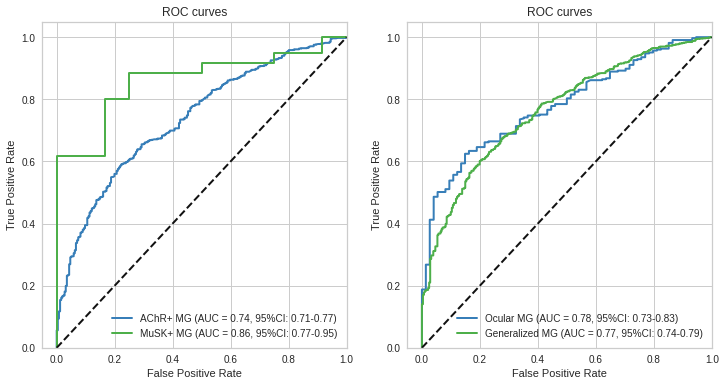

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.plot(roc_subtype(Evaluation_AChR)[0], roc_subtype(Evaluation_AChR)[1], color='#377eb8', lw= 2,
             label= f'AChR+ MG (AUC = {roc_subtype(Evaluation_AChR)[2]:0.2f}, 95%CI: {roc_subtype(Evaluation_AChR)[3][0]:0.2f}-{roc_subtype(Evaluation_AChR)[3][1]:0.2f})')
ax1.plot(roc_subtype(Evaluation_MuSK)[0], roc_subtype(Evaluation_MuSK)[1], color='#4daf4a', lw= 2,
             label= f'MuSK+ MG (AUC = {roc_subtype(Evaluation_MuSK)[2]:0.2f}, 95%CI: {roc_subtype(Evaluation_MuSK)[3][0]:0.2f}-{roc_subtype(Evaluation_MuSK)[3][1]:0.2f})')
ax1.plot([0, 1], [0, 1], 'k--', lw=lw)
ax1.set(title='ROC curves', xlabel='False Positive Rate', ylabel='True Positive Rate', xlim=[-0.05, 1.0], ylim=[0.0, 1.05])
ax1.legend(loc="lower right")


ax2.plot(roc_subtype(Evaluation_Ocular)[0], roc_subtype(Evaluation_Ocular)[1], color='#377eb8', lw= 2,
             label= f'Ocular MG (AUC = {roc_subtype(Evaluation_Ocular)[2]:0.2f}, 95%CI: {roc_subtype(Evaluation_Ocular)[3][0]:0.2f}-{roc_subtype(Evaluation_Ocular)[3][1]:0.2f})')
ax2.plot(roc_subtype(Evaluation_generalized)[0], roc_subtype(Evaluation_generalized)[1], color='#4daf4a', lw= 2,
             label= f'Generalized MG (AUC = {roc_subtype(Evaluation_generalized)[2]:0.2f}, 95%CI: {roc_subtype(Evaluation_generalized)[3][0]:0.2f}-{roc_subtype(Evaluation_generalized)[3][1]:0.2f})')
ax2.plot([0, 1], [0, 1], 'k--', lw=lw)
ax2.set(title='ROC curves', xlabel='False Positive Rate', ylabel='True Positive Rate', xlim=[-0.05, 1.0], ylim=[0.0, 1.05])
ax2.legend(loc="lower right")

plt.savefig('Subtype ROC.svg', dpi=300, transparent=True)

# Feature importance

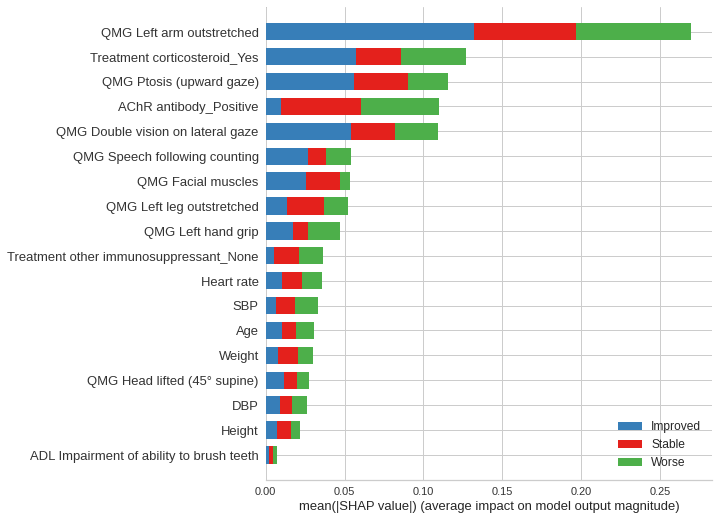

In [20]:
import shap as shap
import matplotlib.colors

# Generate colormap through matplotlib
cmap =matplotlib.colors.ListedColormap(['#377eb8', '#e4211c', '#4daf4a'], name='from_list', N=None)


import matplotlib.pyplot as pl

class_names= ['Improved', 'Stable', 'Worse']

X_train_transformed= get_config('X_train')
X_test_transformed= get_config('X_test')
 
shap_values = shap.TreeExplainer(tuned_model).shap_values(X_train_transformed)
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar", color=cmap, class_names = class_names, show=False)

plt.savefig('feature importance.svg')

# Save the final model

In [21]:
save_model(tuned_model, 'MG_predictive_multiclass')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Clinical_type',
                                                        'MGFA_type',
                                                        'ADL: Eyelid droop',
                                                        'ADL: Double vision',
                                                        'QMG: Vital capacity',
                                                        'ADL: Talking',
                                                        'ADL: Swallowing',
                                                        'QMG: Right arm '
                                                        'outstretched',
                                                        'QMG: Right leg '
                                                        'outstretched',
          

# Patient case

In [31]:
explainer = shap.TreeExplainer(tuned_model)
explainer.expected_value

array([0.33179476, 0.33505207, 0.33315317])

In [32]:
shap.initjs()
Force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1][47], X_train_transformed.iloc[[47]]) 
shap.save_html('Patient 1: stable.html', Force_plot)
Force_plot

In [33]:
Force_plot = shap.force_plot(explainer.expected_value[2], shap_values[2][43], X_train_transformed.iloc[[43]]) 
shap.save_html('Patient 2: worse.html', Force_plot) 
Force_plot

In [34]:
Force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1][43], X_train_transformed.iloc[[43]]) 
shap.save_html('Patient 2: Stable.html', Force_plot) 
Force_plot

In [35]:
Force_plot = shap.force_plot(explainer.expected_value[0], shap_values[0][43], X_train_transformed.iloc[[43]]) 
shap.save_html('Patient 2: Improved.html', Force_plot) 
Force_plot

In [36]:
Force_plot = shap.force_plot(explainer.expected_value[0], shap_values[0][33], X_train_transformed.iloc[[33]]) 
shap.save_html('Patient 3: Improved.html', Force_plot) 
Force_plot